Pandas Tutorial: https://www.kaggle.com/code/kuchhbhi/pandas-zero-to-hero/notebook

# Credit Card Fraud Detector

## I. Datensatz einlesen

Der Datensatz stammt von Kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data)

In [3]:
file_path = 'creditcard_2023.csv'

In [4]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


## II. Datensatz beschreiben

- Die Daten beinhaltet über 550.000 Überweisungen von Europäischen Kreditkarten Besitzern aus dem Jahr 2023.
- Jede Überweisung ist mit einer ID, der Summe und 28 anonymisierten Features, zur validierung ausgestattet. Außerdem besagt die Spalte "Class", mit 1 oder 0, ob es sich um Betrug handelt oder nicht.

In [5]:
data = pd.read_csv(file_path)
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
print(data.describe())

                  id            V1            V2            V3            V4   
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  \
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9   
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  \
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.00000

Anhand des Durchschnittswertes der Spalte "Class" lässt sich ableiten, das es sich bei der Hälfte der daten um Betrug handelt

## III. Modelle trainieren


### Dimensionieren
Zum trainieren der Modelle, schieben wir die Validierungsspalte "Class" auf eine andere Dimension, als der Rest der Daten

In [6]:
X = data.drop("Class", axis=1)
y = data["Class"]

### Trainings- und Testdaten erstellen

Hier trennen wir en Datensatz in Test- und Trainingsdaten beziehungsweise im Verhältnis 40/60.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

### Lineares Modell



In [11]:
print('Linear Model')
model = LinearRegression()
print('Train R2: {}'.format(r2_score(y_train, model.fit(X_train, y_train).predict(X_train))))
print('Test R2: {}'.format(r2_score(y_test, model.fit(X_train, y_train).predict(X_test))))
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print('Mean score: {}'.format(scores.mean()))
print('Std score: {}'.format(scores.std()))

Linear Model
Train R2: 0.8695167420005889
Test R2: 0.8703884903834733
Mean score: 0.8694297348447068
Std score: 0.0006589234758747019


### Confusion Matrix - Linear Regression
-Eine Tabelle, um die Anzahl der Korrekten und falschen Vorhersagen des Modells für jede Klasse.

-Sie ermöglicht es uns, die Leistung des modells für jede Klasse individuell zu bewerten und potenzielle Probleme wie Fehlklassifikationen oder Bias zu identifizieren.


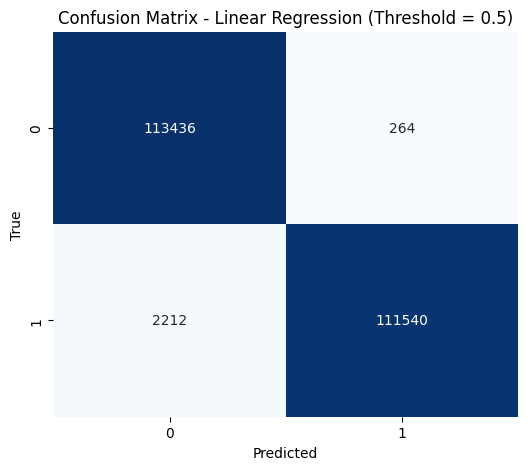

In [20]:
y_pred_prob = model.predict(X_test)

threshold = 0.5

y_pred_binary = [1 if prob >= threshold else 0 for prob in y_pred_prob]

cm_regression = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_regression, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Linear Regression (Threshold = {})'.format(threshold))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

-Falsche Negative (Unten links): Die Anzahl der falschen Vorhersagen der negativen Klasse.

-Falsche Positive (Oben rechts): Die Anzahl der falschen Vorhersagen der positiven Klasse.

-True Negative (Oben links): Die Anzahl der korrekten Vorhersagen der negativen Klasse.

-True Positive (Unten rechts): Die Anzahl der korrekten Vorhersagen der positiven Klasse.




### Quadratiches Modell

In [8]:
print('Quadratic Model')
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
model = LinearRegression()
print('Train R2: {}'.format(r2_score(y_train, model.fit(X_train_poly, y_train).predict(X_train_poly))))
print('Test R2: {}'.format(r2_score(y_test, model.fit(X_train_poly, y_train).predict(X_test_poly))))
scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')
print('Scores: {}'.format(scores))
print('Mean score: {}'.format(scores.mean()))
print('Std score: {}'.format(scores.std()))

Quadratic Model
Train R2: 0.9526938740094649
Test R2: 0.9512598731724706
Scores: [0.94855421 0.75653527 0.93902243 0.9466169  0.95156746]
Mean score: 0.9084592529920956
Std score: 0.07607487690979878


regularisieren wäre notwendig, die scores zu stabilisieren

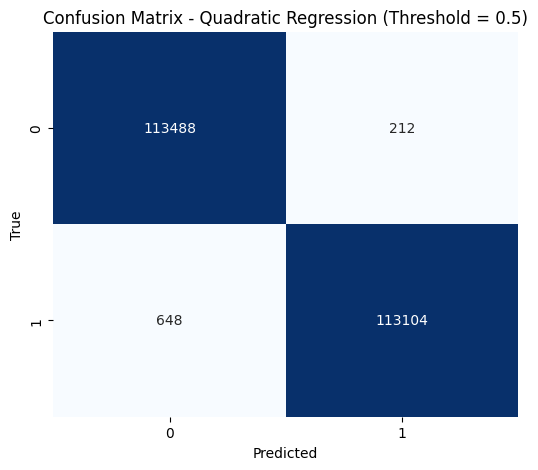

In [9]:
y_pred_prob = model.predict(X_test_poly)

threshold = 0.5

y_pred_binary = [1 if prob >= threshold else 0 for prob in y_pred_prob]

cm_regression = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_regression, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Quadratic Regression (Threshold = {})'.format(threshold))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Random Forest Regressor

In [11]:
print('Random Forest Regressor')
model = RandomForestRegressor()
print('Train R2: {}'.format(r2_score(y_train, model.fit(X_train, y_train).predict(X_train))))
print('Test R2: {}'.format(r2_score(y_test, model.fit(X_train, y_train).predict(X_test))))
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print('Scores: {}'.format(scores.mean()))
print('Mean score: {}'.format(scores.mean()))
print('Std score: {}'.format(scores.std()))

Random Forest Regressor
Train R2: 0.999860491587659
Test R2: 0.9991086435353541
Scores: 0.9990028074271246
Mean score: 0.9990028074271246
Std score: 9.593066636788939e-05


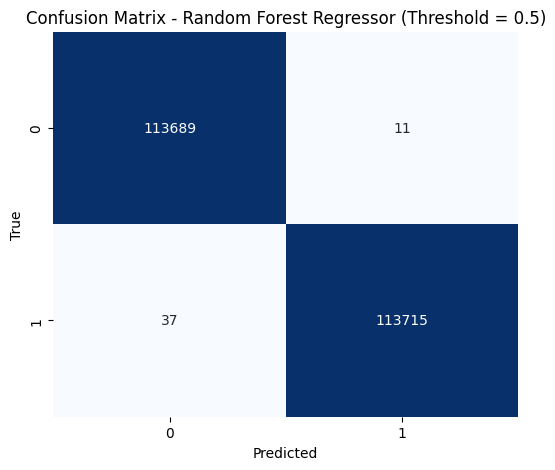

In [12]:
y_pred_prob = model.predict(X_test)

threshold = 0.5

y_pred_binary = [1 if prob >= threshold else 0 for prob in y_pred_prob]

cm_regression = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_regression, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Regressor (Threshold = {})'.format(threshold))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### IV. Prinzipielle Komponenten Analyse
 In diesem Beispiel wird die PCA angewendet, um den Datensatz von Kreditkartbetrug und Nicht-Betrug zu visualisieren. Durch die Reduzierung der Dimensionen auf zwei Hauptkomponenten kann man die Datenpunkte in einem zweidimensionalen Raum darstellen und mögliche Muster oder Trennlinnien zwischen den beiden Klassen identifizieren.


<function matplotlib.pyplot.show(close=None, block=None)>

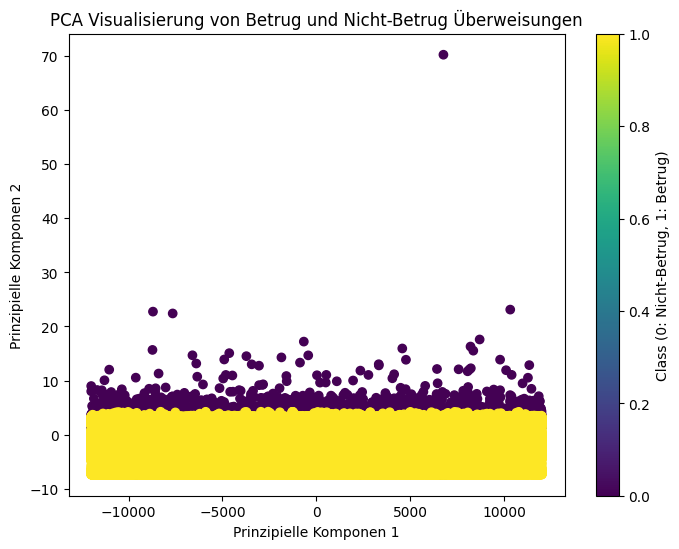

In [17]:
X = data.drop(['id', 'Class'], axis=1)

# Durchführung von PCA mit 2 Komponenten zur Visualisierung
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA visualisieren
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Class'], cmap='viridis')
plt.title('PCA Visualisierung von Betrug und Nicht-Betrug Überweisungen')
plt.xlabel('Prinzipielle Komponente 1')
plt.ylabel('Prinzipielle Komponente 2')
plt.colorbar(label='Class (0: Nicht-Betrug, 1: Betrug)')
plt.show

Explain Variance Ratio auf Y acshe
anzahl hauptkomponenten auf X achse > was gehört zu welchem inoput features

Lime und SHAP 
und Decision trees?

Korrelationsmatrix berechnen und zeigen

nicht so viel über daten muss man mehr über modelle sagen